# データを読み込んで、機械学習に使用できるように処理しよう

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("mpgdata.csv")
df

,MPG,Cyl,Displacement,Horsepower,Weight,Acceleration,Year,CountryCode,Model
0,18.0,8,307.0,130,3504,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165,3693,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150,3436,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150,3433,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140,3449,10.5,70,1,"""ford torino"""
...,...,...,...,...,...,...,...,...,...
401,27.0,4,140.0,86,2790,15.6,82,1,"""ford mustang gl"""
402,44.0,4,97.0,52,2130,24.6,82,2,"""vw pickup"""
403,32.0,4,135.0,84,2295,11.6,82,1,"""dodge rampage"""
404,28.0,4,120.0,79,2625,18.6,82,1,"""ford ranger"""


## 欠損値の確認

In [25]:
df.isna().sum()

MPG             0
Cyl             0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Year            0
CountryCode     0
Model           0
dtype: int64

## ダミー変数への変換

In [26]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder() #LabelEncoderのインスタンスを生成
le = le.fit(df['Model']) #ラベルエンコーディング処理
df['Model'] = le.transform(df['Model']) #ラベルエンコーディングをdfに適用
df

,MPG,Cyl,Displacement,Horsepower,Weight,Acceleration,Year,CountryCode,Model
0,18.0,8,307.0,130,3504,12.0,70,1,51
1,15.0,8,350.0,165,3693,11.5,70,1,36
2,18.0,8,318.0,150,3436,11.0,70,1,239
3,16.0,8,304.0,150,3433,12.0,70,1,15
4,17.0,8,302.0,140,3449,10.5,70,1,166
...,...,...,...,...,...,...,...,...,...
401,27.0,4,140.0,86,2790,15.6,82,1,155
402,44.0,4,97.0,52,2130,24.6,82,2,308
403,32.0,4,135.0,84,2295,11.6,82,1,121
404,28.0,4,120.0,79,2625,18.6,82,1,162


# 機械学習を実行しよう

# データ入力と学習

In [27]:
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split

# 入力データと正解ラベルに分割
data = np.array(df)    # Numpy配列に変換
X = data[:,1:]
y = data[:,0]

# 学習データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# サポートベクターマシンによる学習
model = svm.SVR(C=1.0, kernel='linear', epsilon=0.1) # 正則化パラメータ=1, 線形カーネルを使用
model.fit(X_train, y_train) # 学習

SVR(kernel='linear')

## 決定係数

In [29]:
r2_train = model.score(X_train, y_train)  
r2_test = model.score(X_test, y_test)
print("決定係数_train：" + str(r2_train))
print("決定係数_test：" + str(r2_test))

決定係数_train：0.6501005565611568
決定係数_test：0.6565213999326567


## RMSE

In [30]:
from sklearn.metrics import mean_squared_error

# 学習済みモデルを利用した予測値
y_pre_train = model.predict(X_train)    # 学習データでの予測
y_pre_test = model.predict(X_test)      # テストデータでの予測

# RMSEの計算
RMSE_train = np.sqrt(mean_squared_error(y_train, y_pre_train))
RMSE_test = np.sqrt(mean_squared_error(y_test, y_pre_test))

print("RMSE_train:" + str(RMSE_train))
print("RMSE_test:" + str(RMSE_test))

RMSE_train:4.700024388109676
RMSE_test:5.4772682070455705


## グラフ描画

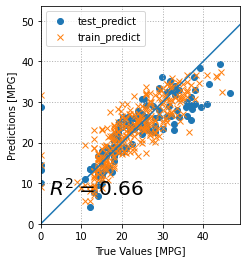

In [31]:
plt.grid(linestyle='dotted', linewidth=1)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.scatter(y_test, y_pre_test, label='test_predict', lw=1, marker="o")
plt.scatter(y_train, y_pre_train, label='train_predict', lw=1, marker="x")
plt.legend()
plt.text(0.5, 7, '$\ R^{2}=$' + str(round(r2_test, 2)), fontsize=20)
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])
plt.show()